# Association Analysis

## Specifying the question
Part 3: Association Rules

Create association rules that will allow you to identify relationships between variables in the dataset. Provided dataset comprises of groups of items that will be associated with others. Provide insights for analysis done. Data to use is http://bit.ly/SupermarketDatasetII

In [1]:
# We first we install the required arules library 
#
install.packages("arules")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Loading the arules library
#
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [3]:
# Loading our transactions dataset from our csv file

path <-"Supermarket_Sales_Dataset II.csv"

Transactions <- read.transactions(path)
Transactions

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 5729 items (columns)

In [4]:
# Verifying the object's class
# ---
# This should show us transactions as the type of data that we will need
# ---
# 
class(Transactions)

[1] "transactions"
attr(,"package")
[1] "arules"

In [5]:
# Previewing our first 5 transactions
#
inspect(Transactions[1:5])

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          
[4] {turkey,avocado}                   
[5] {bar,whole,                        
     mineral,                          
     rice,green,                       
     tea,                              
     water,milk,energy,                
     wheat}                            


In [6]:
# If we wanted to preview the items that make up our dataset,
# alternatively we can do the following
# ---
# 
items<-as.data.frame(itemLabels(Transactions))
colnames(items) <- "Item"
head(items, 10)   

,Item
,<fct>
1,&
2,accessories
3,"accessories,antioxydant"
4,"accessories,champagne,fresh"
5,"accessories,champagne,protein"
6,"accessories,chocolate"
7,"accessories,chocolate,champagne,frozen"
8,"accessories,chocolate,frozen"
9,"accessories,chocolate,low"


In [7]:
# Generating a summary of the transaction dataset
# ---
# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
# ---
# 
summary(Transactions)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 5729 columns (items) and a density of 0.0005421748 

most frequent items:
    tea   wheat mineral     fat  yogurt (Other) 
    803     645     577     574     543   20157 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   15   16 
1603 2007 1382  942  651  407  228  151   70   39   13    5    1    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.106   4.000  16.000 

includes extended item information - examples:
                   labels
1                       &
2             accessories
3 accessories,antioxydant

In [8]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing 
# some operation in percentage terms of the total transactions 
# 
itemFrequency(Transactions[, 8:10],type = "absolute")
round(itemFrequency(Transactions[, 8:10],type = "relative")*100,2)

accessories,chocolate,frozen        accessories,chocolate,low 
                               1                                1 
accessories,chocolate,pasta,salt 
                               1

accessories,chocolate,frozen        accessories,chocolate,low 
                            0.01                             0.01 
accessories,chocolate,pasta,salt 
                            0.01

In [9]:
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))


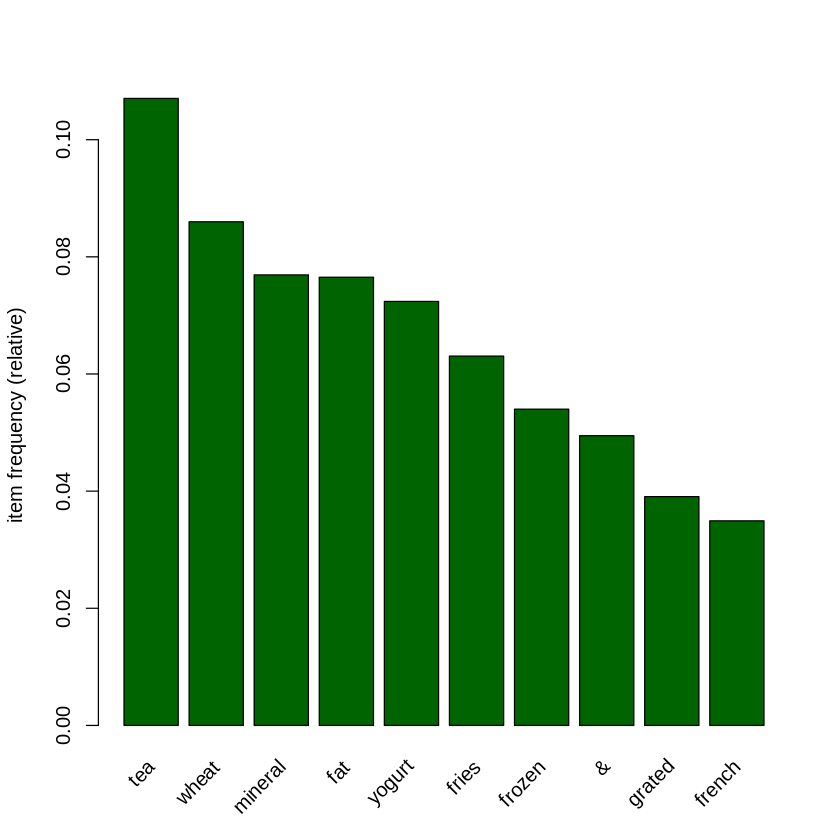

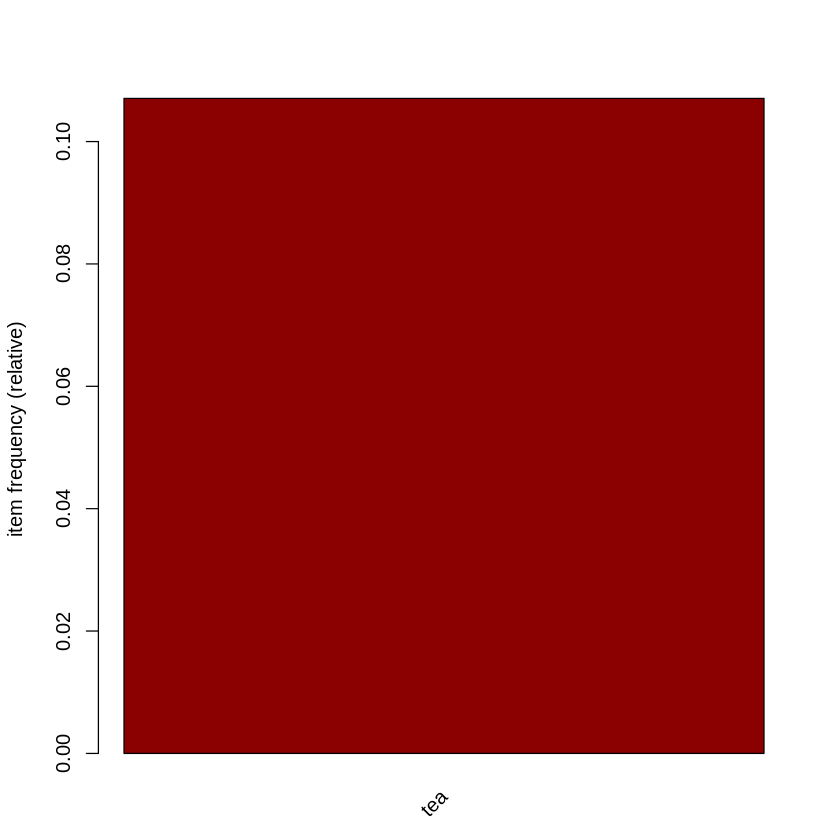

In [10]:
# plot the frequency of items
itemFrequencyPlot(Transactions, topN = 10,col="darkgreen")
itemFrequencyPlot(Transactions, support = 0.1,col="darkred")

In [11]:
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.001 and confidence as 0.8
# ---
# 
rules <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.8))
rules


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [354 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [271 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 271 rules 

In [12]:
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (Transactions,parameter = list(supp = 0.002, conf = 0.8)) 

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.6)) 

rules2

rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [189 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [99 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort ve

set of 99 rules 

set of 319 rules 

In [13]:
# We can perform an exploration of our model 
# through the use of the summary function as shown
# ---
# Upon running the code, the function would give us information about the model 
# i.e. the size of rules, depending on the items that contain these rules. 
# In our above case, most rules have 3 and 4 items though some rules do have upto 6. 
# More statistical information such as support, lift and confidence is also provided.
# ---
# 
summary(rules)

set of 271 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
107 144  20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.679   3.000   4.000 

summary of quality measures:
    support           confidence         lift             count       
 Min.   :0.001067   Min.   :0.800   Min.   :  7.611   Min.   :  8.00  
 1st Qu.:0.001200   1st Qu.:0.931   1st Qu.: 11.630   1st Qu.:  9.00  
 Median :0.001600   Median :1.000   Median : 13.068   Median : 12.00  
 Mean   :0.002834   Mean   :0.963   Mean   : 22.372   Mean   : 21.26  
 3rd Qu.:0.002666   3rd Qu.:1.000   3rd Qu.: 20.218   3rd Qu.: 20.00  
 Max.   :0.068391   Max.   :1.000   Max.   :613.718   Max.   :513.00  

mining info:
         data ntransactions support confidence
 Transactions          7501   0.001        0.8

In [14]:
# Observing rules built in our model i.e. first 5 model rules
# ---
# 
inspect(rules[1:15])

     lhs                                rhs      support     confidence
[1]  {cookies,low}                   => {yogurt} 0.001066524 1.0000000 
[2]  {cookies,low}                   => {fat}    0.001066524 1.0000000 
[3]  {extra}                         => {dark}   0.001066524 1.0000000 
[4]  {burgers,whole}                 => {wheat}  0.001199840 1.0000000 
[5]  {fries,escalope,pasta,mushroom} => {cream}  0.001066524 1.0000000 
[6]  {fries,cookies,green}           => {tea}    0.001333156 1.0000000 
[7]  {shrimp,whole}                  => {wheat}  0.001066524 1.0000000 
[8]  {rice,cake}                     => {wheat}  0.001333156 1.0000000 
[9]  {tomatoes,whole}                => {wheat}  0.001066524 0.8000000 
[10] {rice,chocolate}                => {wheat}  0.001199840 0.9000000 
[11] {flour,green}                   => {weat}   0.001199840 1.0000000 
[12] {rice,chocolate,french}         => {wheat}  0.001066524 1.0000000 
[13] {cake,low}                      => {yogurt} 0.001066524 0.8

In [15]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                                rhs      support     confidence lift    
[1] {cookies,low}                   => {yogurt} 0.001066524 1          13.81400
[2] {cookies,low}                   => {fat}    0.001066524 1          13.06794
[3] {extra}                         => {dark}   0.001066524 1          83.34444
[4] {burgers,whole}                 => {wheat}  0.001199840 1          11.62946
[5] {fries,escalope,pasta,mushroom} => {cream}  0.001066524 1          47.77707
    count
[1] 8    
[2] 8    
[3] 8    
[4] 9    
[5] 8    


In [16]:
# If we're interested in making a promotion relating to the sale of yogurt, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing yogurt
# ---
# 
yogurt <- subset(rules, subset = rhs %pin% "yogurt")
 
# Then order by confidence
yogurt<-sort(yogurt, by="confidence", decreasing=TRUE)
inspect(yogurt[1:5])

    lhs                  rhs      support     confidence lift   count
[1] {cookies,low}     => {yogurt} 0.001066524 1          13.814  8   
[2] {wine,low}        => {yogurt} 0.001333156 1          13.814 10   
[3] {cheese,low}      => {yogurt} 0.001733102 1          13.814 13   
[4] {mayo,low}        => {yogurt} 0.001733102 1          13.814 13   
[5] {cookies,low,fat} => {yogurt} 0.001066524 1          13.814  8   


If someone buys cookies and low, they are 100% likely to buy yogurt too. 

In [17]:
# What if we wanted to determine items that customers might buy 
# who have previously bought yogurt?
# ---
# 
# Subset the rules
yogurt <- subset(rules, subset = lhs %pin% "yogurt")

# Order by confidence
yogurt<-sort(yogurt, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(yogurt[15:19])

    lhs                     rhs     support     confidence lift     count
[1] {juice,low,yogurt}   => {fat}   0.002532996 1          13.06794 19   
[2] {bread,low,yogurt}   => {fat}   0.003732836 1          13.06794 28   
[3] {water,whole,yogurt} => {fat}   0.001199840 1          13.06794  9   
[4] {water,whole,yogurt} => {wheat} 0.001199840 1          11.62946  9   
[5] {tea,yogurt,green}   => {fat}   0.004666045 1          13.06794 35   
